In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [19]:
from pandas import read_csv

data = pd.read_csv("cancer.csv")
X = data.drop(columns = ["Survival "])
y = data["Survival "]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



C:\Users\helen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


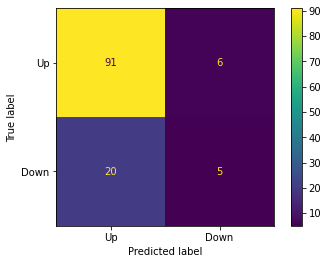

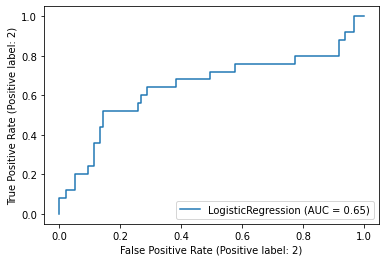

In [22]:
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 0).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred = clf.predict(X_test)

labels = ["Up", "Down"]

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()


print(classification_report(y_test, y_pred, labels = clf.classes_))

plot_roc_curve(clf, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



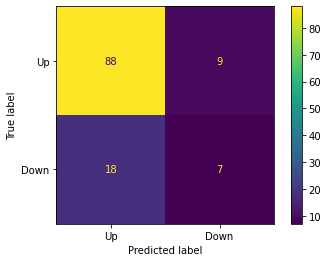

In [23]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()

print(classification_report(y_test, rf_pred, labels = clf.classes_))

              precision    recall  f1-score   support

           1       0.80      0.97      0.88        97
           2       0.40      0.08      0.13        25

    accuracy                           0.79       122
   macro avg       0.60      0.52      0.51       122
weighted avg       0.72      0.79      0.73       122



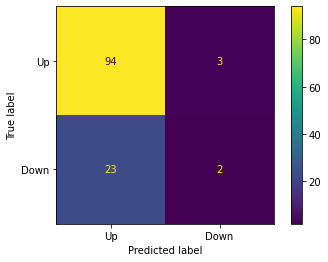

In [24]:
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()

print(classification_report(y_test, svm_pred, labels = clf.classes_))

              precision    recall  f1-score   support

           1       0.83      0.88      0.85        97
           2       0.37      0.28      0.32        25

    accuracy                           0.75       122
   macro avg       0.60      0.58      0.58       122
weighted avg       0.73      0.75      0.74       122



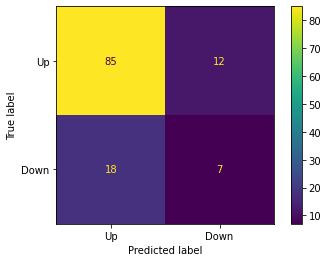

In [25]:
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()

print(classification_report(y_test, nn_pred, labels = clf.classes_))

In [26]:
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


In [28]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}